In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

# Задание 5.1

In [167]:
size = 8
#Создадим массивы с годами и населенеием в эти года
x = np.array([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], dtype='float64')
y = np.array([8.6, 10, 11.9, 14.7, 18.5, 23.5, 27.01, 28.61], dtype='float64')

In [174]:
#Случайная начальная степень многочлена
degr = 2

#Массив коэффицентов s
s = np.zeros(size)
#Массив коэффицентов a
a = np.zeros(size)
#Массив решений нормальной системы b
b = np.zeros(size)

#Поиск коэффицентов s и решений нормальной системы b
def findSB(x, y, degr, slen):
    b = np.zeros(degr)
    s = np.zeros(slen)
    for i in range (degr):
        sum = 0
        for j in range (size):
            sum += y[j]*(x[j]**(i)) 
        b[i] = sum
    for i in range (slen):
        sum = 0
        for j in range (size):
            sum += x[j]**(i)  
        s[i] = sum
    return b, s

#найдём а
def findA(b, s, degr):
    B = np.zeros(degr)
    for i in range (degr):
        B[i] = b[i]
    A = np.zeros((degr, degr))
    for i in range (degr):
        ih = i
        for j in range (degr):
            A[i][j] = s[ih]
            ih += 1
    X = np.linalg.solve(A, B)
    return X

#население в каком-то году
def findPop(year, ares):
    res = 0
    for i in range (len(ares)):
        res += ares[i] * ((year)**(i))
    return res

#СКО
def avSqEr(ares, x, y):
    sum = 0
    ind = 0
    for i in range (1950, 2021, 10):
        sum += (findPop(i, ares) - y[ind])**(2)
        ind += 1
    return ((1/size + 1) * sum)**(1/2)

#итоговая функция для решения
def leastSqMeth(x, y, degr):
    slen = 3
    for i in range (size - 2):
        b, s = findSB(x, y, degr, slen)
        a = findA(b, s, degr)
        sk = avSqEr(a, x, y)
        print("Среднеквадратичная ошибка, многочлена степени", degr, " = ", sk)
        degr += 1
        slen += 2
    return a

ares = leastSqMeth(x, y, degr)

Среднеквадратичная ошибка, многочлена степени 2  =  3.446825791320781
Среднеквадратичная ошибка, многочлена степени 3  =  2.75700293408906
Среднеквадратичная ошибка, многочлена степени 4  =  1.2581443165257045
Среднеквадратичная ошибка, многочлена степени 5  =  1.3184391126510162
Среднеквадратичная ошибка, многочлена степени 6  =  1.1591900543697777
Среднеквадратичная ошибка, многочлена степени 7  =  0.7192981821693181


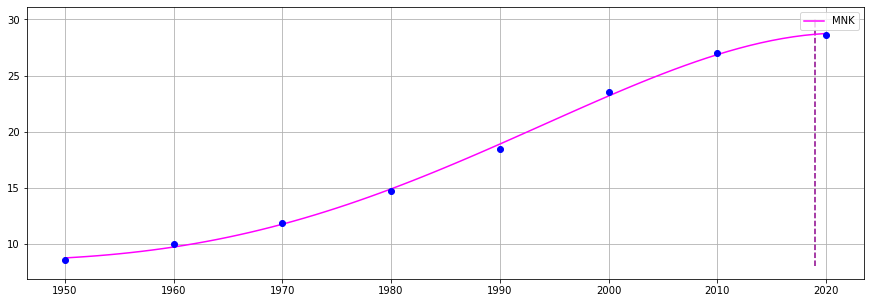

In [175]:
fig, axs = plt.subplots(1,1,figsize = (15,5))
axs.grid()
axs.plot(np.arange(1950,2021),[showPop(j, ares)  for j in range(1950,2021)], color = 'fuchsia', label = 'MNK')
axs.plot(x, y, 'bo')
axs.vlines(2019, 8, 30, color = 'darkmagenta', ls = 'dashed')

plt.legend()

In [176]:
#Массив с коэффицентами
coeff = np.zeros(size)

#найдём эти самые коэффициенты
def inter(x, y, size):
    с = np.zeros(size)
    for i in range (size):
        p = 1
        for j in range (size):
            if(i != j):
                p *= x[i] - x[j]
        с[i] = y[i]/p
    return с

#В определённый год
def showYear(year, x, coeff, size):
    res = 0
    for i in range (size):
        p = 1
        for j in range (size):
            if (i != j):
                p *= year - x[j]
        res += coeff[i] * p
    return res
        
#Создадим массив коэффицентов
coeff = inter(x, y, size)

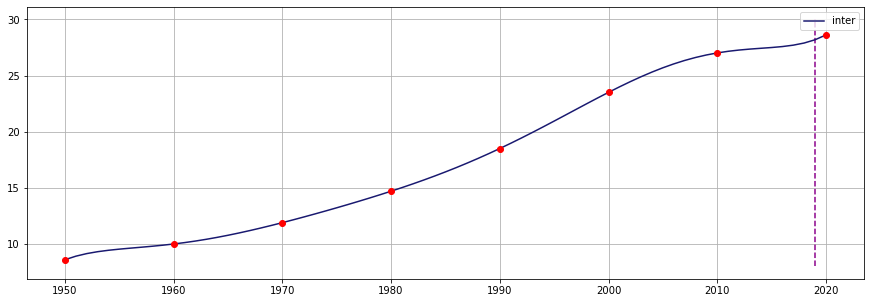

In [177]:
fig, axs = plt.subplots(1,1,figsize = (15,5))
axs.grid()
axs.plot(np.arange(1950,2021),[showYear(j, x, coeff, size)  for j in range(1950,2021)], color = 'midnightblue', label = 'inter')
axs.legend()
axs.plot(x, y, 'ro')
axs.vlines(2019, 8, 30, color = 'darkmagenta', ls = 'dashed')

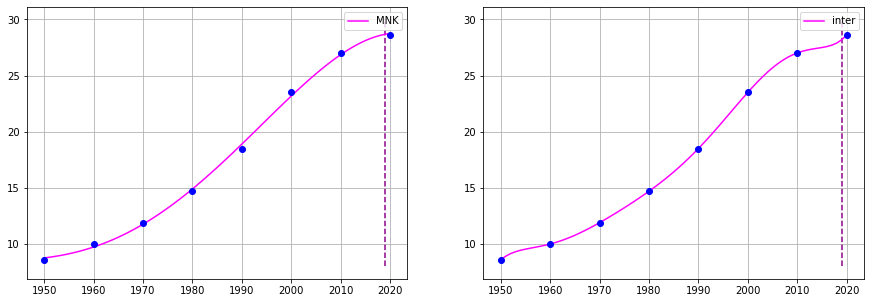

In [178]:
fig, axs = plt.subplots(1, 2, figsize = (15,5))

axs[0].plot(np.arange(1950,2021),[showPop(j, ares)  for j in range(1950,2021)], color = 'fuchsia', label = 'MNK')

axs[1].plot(np.arange(1950,2021),[showYear(j, x, coeff, size)  for j in range(1950,2021)], color = 'fuchsia', label = 'inter')

for i in range (2):
    axs[i].grid()
    axs[i].legend()
    axs[i].plot(x, y, 'bo')
    axs[i].vlines(2019, 8, 30, color = 'darkmagenta', ls = 'dashed')

In [179]:
print("Население в 2019 согласно МНК:           ", round(findPop(2019, ares), 2))
print("Население в 2019 согласно Интерполяции:  ", round(showYear(2019, x, coeff, size), 2))

Население в 2019 согласно МНК:            28.67
Население в 2019 согласно Интерполяции:   28.18


# Задание 5.2

In [1]:
#Отрезок и точность
a = -1
b = 2
eps = 0.001

#Исходная функция
def func(x):
    return 6*np.cos(np.exp(x)+x)

#производная
def dfunc(x):
    return -6*(np.exp(x)+1)*np.sin(np.exp(x)+x)


In [2]:
#Многочлен Лагранжа
def lag(x, y, xh):
    res = 0
    for i in range (y.size):
        p1 = 1
        p2 = 1
        for j in range (x.size):
            if j == i:
                p1 *= 1
                p2 *= 1
            else:
                p1 *= (xh - x[j])
                p2 *= (x[i] - x[j])
        res = res + (y[i]*p1/p2)
    return res

In [3]:
#Многочлен Эрмита
def herm(x1, x2, x):
    h1 = x2 - x1
    y1 = func(x1)
    y2 = func(x2)
    ys1 = dfunc(x1)
    ys2 = dfunc(x2)
    return (y1 * (x - x2)**2 * (2 * (x - x1) + h1)/(h1**3) + y2 *(x - x1)**2 * (2 * (x2 - x) + h1)/(h1**3) + 
            ys1 * (x - x1)* (x - x2)**2 /(h1**2) + ys2 * (x - x1)**2 * (x - x2)/(h1**2))

In [6]:
#Найдём массивы со знечениями наших многочленов
x = np.linspace(a, b, 900) #900 было выбрано подбором, дабы уменьшить погрешности
#найдём значения производной и функции
y = func(x)
dy = dfunc(x)

lagN = 26 #тоже подбор
lagr = [lag(np.linspace(a,b,lagN), func(np.linspace(a,b,lagN)), i) for i in x]

xf = np.linspace(a, b, 90) #колво отрезков разбияения на [a, b]
fHerm = np.zeros(900)
z = 1
for i in range (x.size):
    if (x[i] > xf[z]):
        z += 1
    fHerm[i] = herm(xf[z-1], xf[z], x[i])

In [7]:
#погрешности
deltaLagr = np.zeros(x.size)
deltaHerm = np.zeros(x.size)
deltaLagr = np.abs(y - lagr)
deltaHerm = np.abs(y - fHerm)

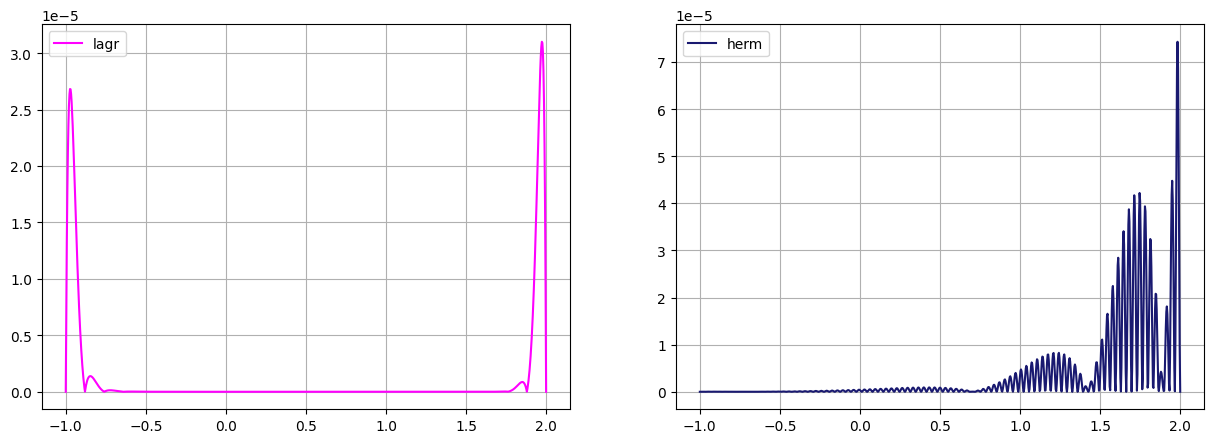

In [8]:
#Графики погрешностей
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(x, deltaLagr, label = 'lagr', color = 'fuchsia')
axs[1].plot(x, deltaHerm, label = 'herm', color = 'midnightblue')

for i in range (2):
    axs[i].legend()
    axs[i].grid()

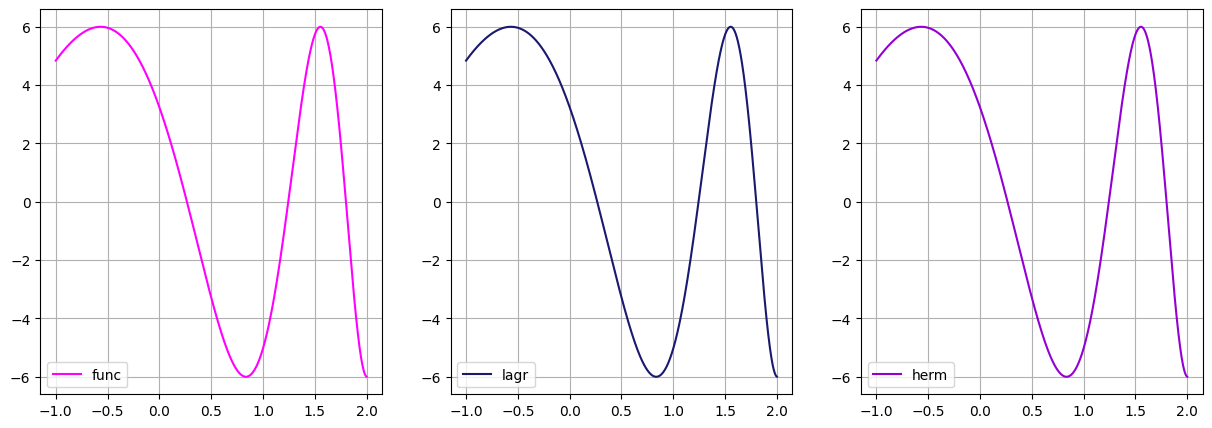

In [9]:
#Построим графики всех имеющихся в итоге функций
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
axs[0].plot(x, y, label = 'func', color = 'fuchsia')
axs[1].plot(x, lagr, label = 'lagr', color = 'midnightblue')
axs[2].plot(x, fHerm, label = 'herm', color = 'darkviolet')

for i in range (3):
    axs[i].legend()
    axs[i].grid()

# Задание 5.3

In [10]:
def func(x):
    return (x**2)*np.sin(x)

#n-ый коэффициент
def nCoeff(n):
    return ((-1)**n)/np.math.factorial(2*n+1)

#ряд Тейлора
def taylor(x, n):
    row = x*0
    for i in range (n):
        row = row + (nCoeff(i)*(x**(2*i+3)))
    return row

In [11]:
#многочлен Чебышева
def T(x, n):
    if n == 0:
        return 1
    if n == 1:
        return x
    return 2*x*T(x, n-1) - T(x, n-2)

#формулы экономизации
def x11(x):
    return (1/1024)*(2816*x**9 - 2816*x**7 + 1232*x**5 - 220*x**3 + 11*x + T(x, 11))

def x10(x):
    return (1/512)*(1280*x**8 - 1120*x**6 + 400*x**4 - 50*x**2 + 1 + T(x, 10))

def x9(x):
    return (1/256)*(576*x**7 - 432*x**5 + 120*x**3 - 9*x + T(x, 9))

def x8(x):
    return (1/128)*(256*x**6 - 160*x**4 + 32*x**2 - 1 + T(x, 8))

def x7(x):
    return (1/64)*(112*x**5 - 56*x**3 + 7*x + T(x, 7))

def x6(x):
    return (1/32)*(48*x**4 - 18*x**2 + 1 + T(x, 6))

def x5(x):
    return (1/16)*(20*x**3 - 5*x + T(x, 5))

def x4(x):
    return (1/8)*(8*x**2 - 1 + T(x, 4))

def x3(x):
    return (1/4)*(3*x + T(x, 3))

def x2(x):
    return (1/2)*(1 + T(x, 2))

def x1(x):
    return T(x, 1)

funcArr = np.array([x11, x10, x9, x8, x7, x6, x5, x4, x3, x2, x1])  

In [12]:
#будем менять x в степени и соответвующие номера Т
eps = 10**(-8)
h = 11
delta = np.empty((funcArr.size))
for i in range (funcArr.size):
    delta[i] = np.amax(np.abs(func(x) - taylor(x, h-1) - nCoeff(h-1)*(funcArr[i](x[i]))))
    print ("Delta", h, "=", delta[i])
    if (delta[i] < eps):
        print ("minus T (", h, ") is true")
    else:
        print ("minus T (", h, ") is false")
    print()
    h -= 1

Delta 11 = 1.6298075958791405e-13
minus T ( 11 ) is true

Delta 10 = 1.707699852518202e-11
minus T ( 10 ) is true

Delta 9 = 1.4569389963632012e-09
minus T ( 9 ) is true

Delta 8 = 9.877526271900067e-08
minus T ( 8 ) is false

Delta 7 = 5.1635976891392255e-06
minus T ( 7 ) is false

Delta 6 = 0.00020004077394881117
minus T ( 6 ) is false

Delta 5 = 0.0054461662373667084
minus T ( 5 ) is false

Delta 4 = 0.09596311291576186
minus T ( 4 ) is false

Delta 3 = 0.9782066245353039
minus T ( 3 ) is false

Delta 2 = 4.2060044156114165
minus T ( 2 ) is false

Delta 1 = 4.603819295734318
minus T ( 1 ) is false



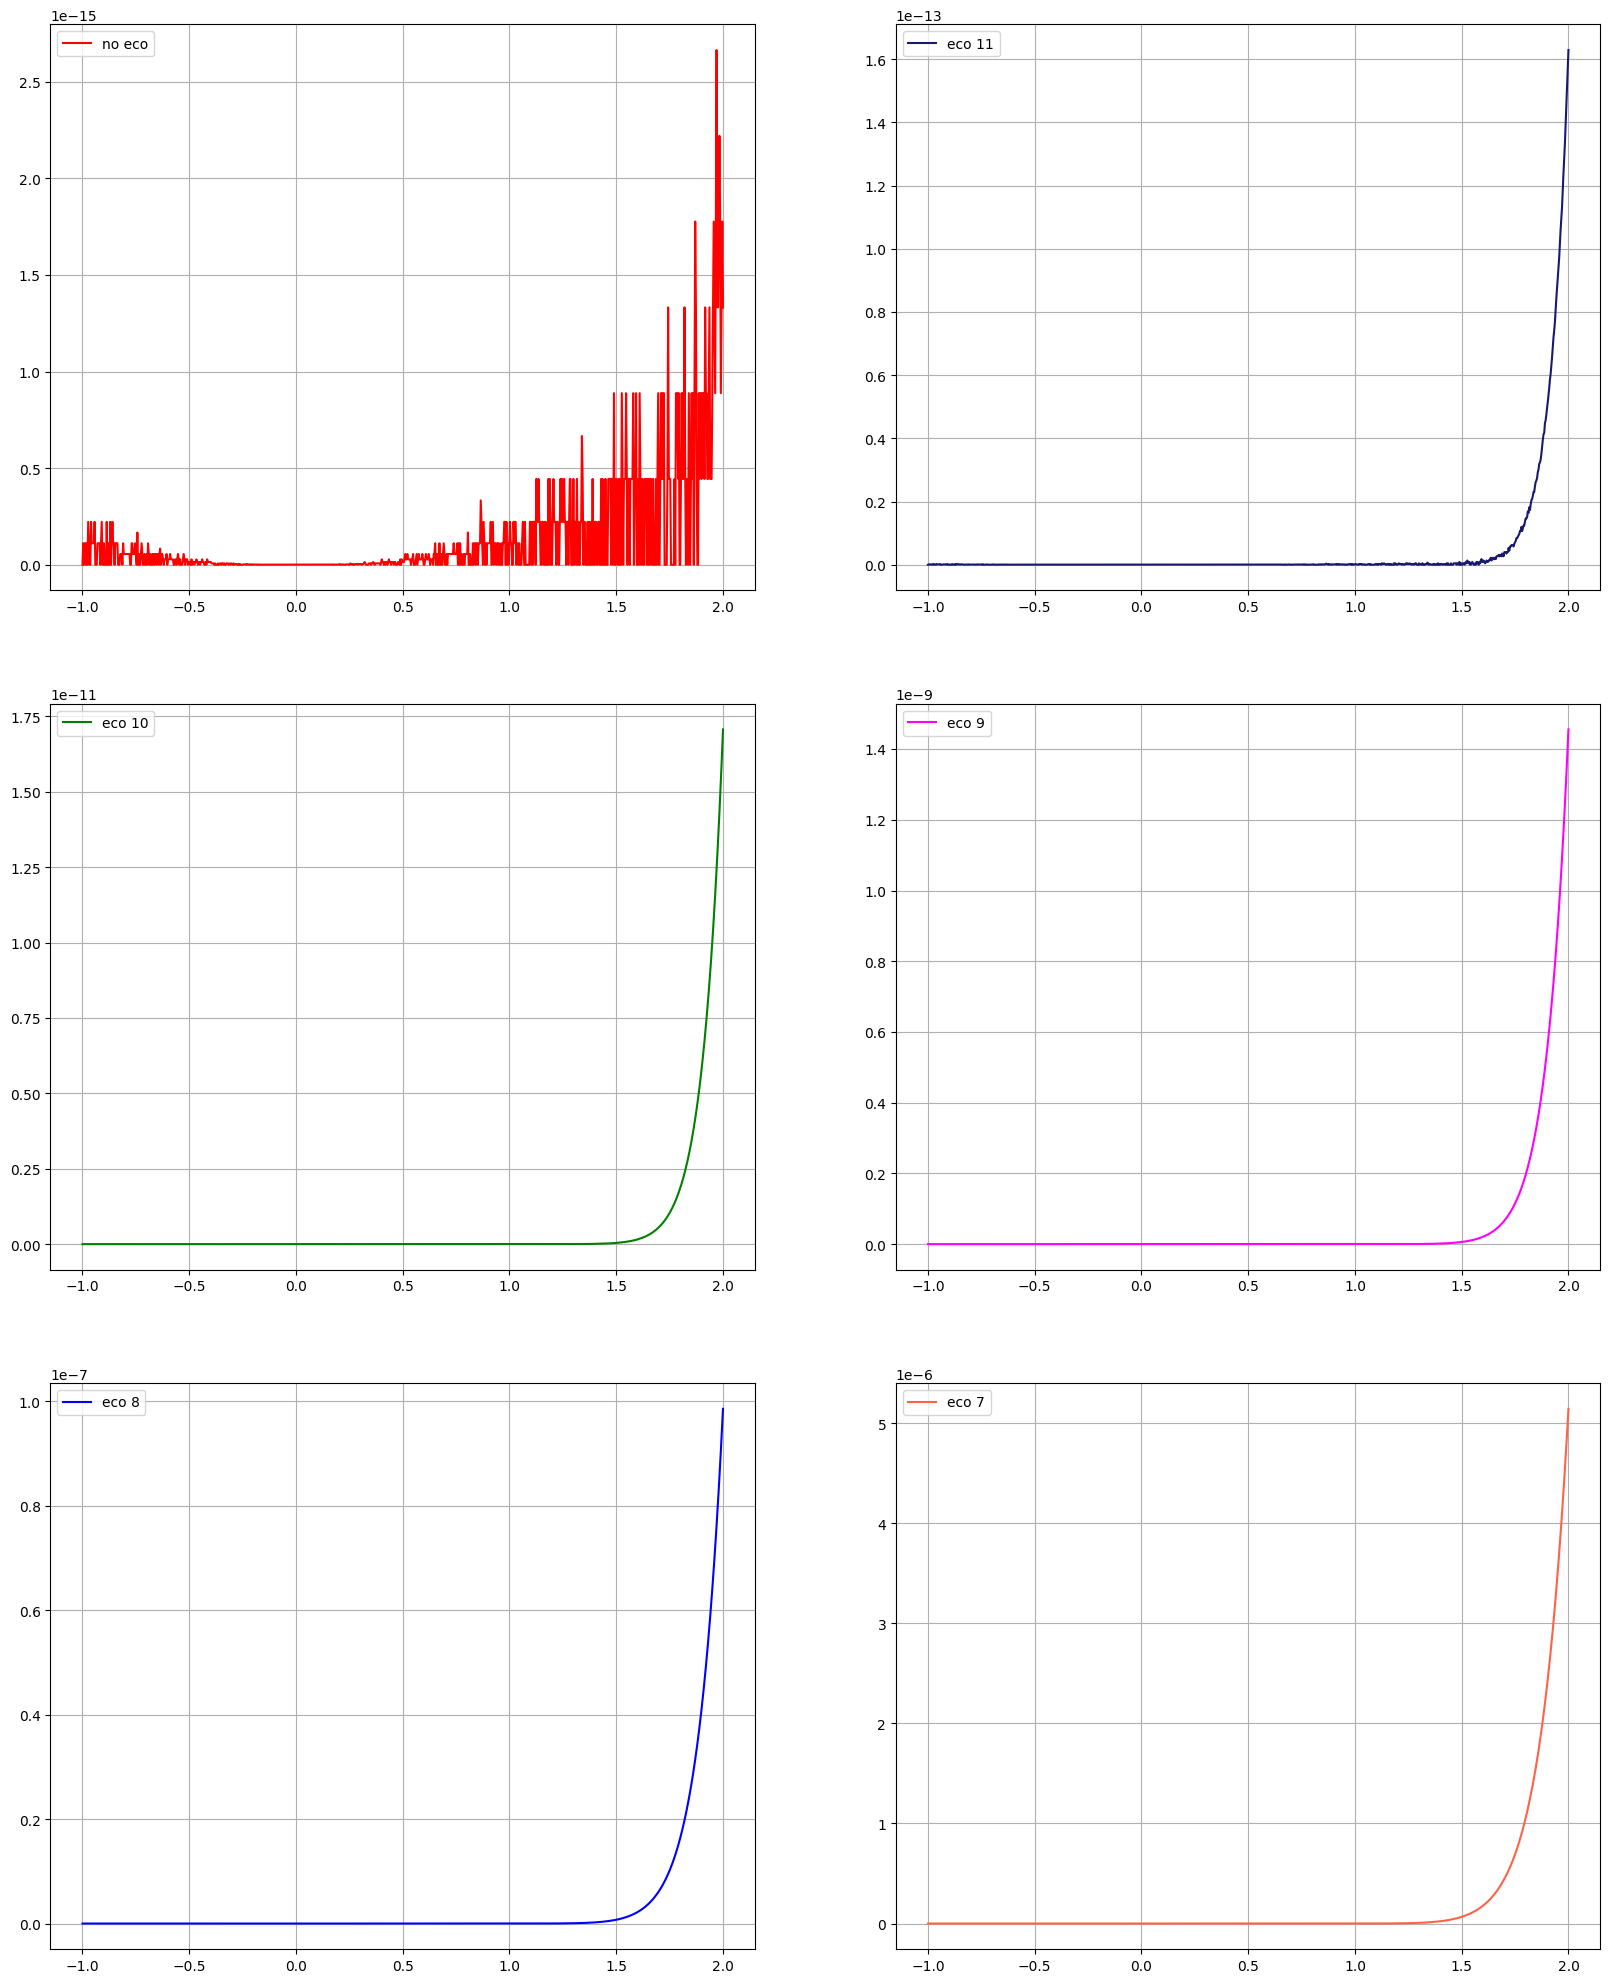

In [13]:
#графики погрешностей
fig, axs = plt.subplots(3, 2, figsize = (20, 25))
axs[0][0].plot(x, np.abs(func(x) - taylor(x, 11)), color = 'red', label = 'no eco')
axs[0][1].plot(x, np.abs(func(x) - taylor(x, 10) - nCoeff(10)*(x11(x))), color = 'midnightblue', label = 'eco 11')
axs[1][0].plot(x, np.abs(func(x) - taylor(x, 9) - nCoeff(9)*(x10(x))), color = 'green', label = 'eco 10')
axs[1][1].plot(x, np.abs(func(x) - taylor(x, 8) - nCoeff(8)*(x9(x))), color = 'fuchsia', label = 'eco 9')
axs[2][0].plot(x, np.abs(func(x) - taylor(x, 7) - nCoeff(7)*(x8(x))), color = 'blue', label = 'eco 8')
axs[2][1].plot(x, np.abs(func(x) - taylor(x, 6) - nCoeff(6)*(x7(x))), color = 'tomato', label = 'eco 7')

for i in range (3):
    for j in range (2):
        axs[i][j].legend()
        axs[i][j].grid()